In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [2]:
from defs import *

In [3]:
def get_counts_data(data_fname='../../distribution-jewish-names/working-github.csv',
                    cols=['josephus','gospels_acts_unattested']):

    import pandas as pd
    
    data=pd.read_csv(data_fname,
                     encoding = 'ISO-8859-1')
    L=len(data.columns)
    data=pd.read_csv(data_fname,
                     usecols=range(13,L),
                     encoding = 'ISO-8859-1').dropna(how='all')
    data.columns=[_.replace(".1","") for _ in data.columns]


    replace_uni=[('A\x9ana', 'Ašna'),
                ('Buhei\x9a','Buheiš'),
                ('U\x9atana', 'Uštana'),
                ]

    subdata={}
    c={}
    for col in cols:

        # # CREATE APOCRYPHAL_UNATTESTED SAMPLE
        # # valid name instances in apocrypha_unattested
        # apocrypha.unattested <- data[which(
        #   data$apocrypha_unattested == 1 &
        #     data$valid_selection2 == 1),
        #   2]
        # # valid name instances outside apocrypha_unattested
        # rest.apocrypha.unattested <- data[which(
        #   data$apocrypha_unattested == 0 &
        #     data$valid_selection == 1 &
        #     data$gospels_acts_unattested == 0),
        #   2]    


        names=data[((data[col]==1) & (data['fictitious']>0))]['name']
        has_fictitious_characters=names.any()

        if has_fictitious_characters:
            idx=data.index[(
                                (data[col]==1) & 
                                (data['valid_selection2']==1)
            )]

        else:
            idx=data.index[(
                                (data[col]==1) & 
                                (data['valid_selection']==1)
            )]


        idx_rest=data.index[(
                            (data[col]==0) & 
                            (data['valid_selection']==1)
        )]

        subdata[col]=data.loc[idx]
        subdata[col+" rest"]=data.loc[idx_rest]


        data1=subdata[col]
        data2=subdata[col+" rest"]

        names=list(set(list(data1['name'])+list(data2['name'])))


        counts1=[len(data1[data1['name']==name]) for name in names]
        counts2=[len(data2[data2['name']==name]) for name in names]

        # unicode hack -- fix this
        for s1,s2 in replace_uni:
            try:
                names[names.index(s1)]=s2
            except IndexError:
                continue


        counts_data=pd.DataFrame({'name':names,col:counts1,'rest':counts2})
        counts_data=counts_data.sort_values(by=['rest','name'],ascending=[False,True],ignore_index=True)

        c[col]=counts_data

    return c 

    

In [4]:
def simulate_texts(source_counts,rest_counts,Nsims=50000,
              distribution='dirichlet'):
    
    from scipy.stats import dirichlet,multinomial,uniform
    from numpy import percentile
    
    rest=np.array(rest_counts)
    source=np.array(source_counts)
    
    rv_all=dirichlet(1+rest)
    f=array(rest).ravel()
    f=f/f.sum()
    
    N=source.sum()
    K=len(source)

    n_all=[]
    for i in tqdm(range(Nsims)):
        if distribution=='dirichlet':
            p=rv_all.rvs().ravel()
        elif distribution=='frequency':
            p=f
        elif distribution=='uniform':
            p=np.ones(K)/K
        else:
            raise ValueError(f"Distribution '{distribution}'' not implemented")

        nn=multinomial(n=N,p=p).rvs().ravel()
        n_all.append(nn)
    n_all=array(n_all)    
    
    
    pl,pm,pu=np.percentile(n_all,[2.5,50,97.5],axis=0)
        
    return pl,pm,pu,n_all


In [5]:
def find_names(use_names,names):
    idx=[]
    for name in use_names:
        equivalence={'Lazarus':'Eleazar',
                     'Judas':'Judah',
                     'John':'Yohanan',
                     'Ananias':'Hananiah',
                     'Jesus':'Joshua',
                     'Matthew':'Mattathias',
                     'Annas':'Hanan',
                     'James':'Jacob',
                    'Manaen':'Menahem',
                     'Zechariah':'Zachariah',
                     'Barabbas':'Abba', 
                    }

        try:
            idx.append(names.index(equivalence[name]))
        except KeyError:
            idx.append(names.index(name))

    return idx

In [6]:
use_names=['Simon','Joseph','Lazarus','Judas','John','Ananias',
          'Jesus','Jonathan','Matthew','Annas','Ishmael','James',
          'Manaen','Saul','Yoezer','Levi','Honi','Dositheus','Zechariah','Samuel',
          'Barabbas','Alexander','Hezekiah','Phineas','Herod','Benaiah']

In [7]:
counts_data=get_counts_data()
counts_data

{'josephus':            name  josephus  rest
 0         Simon        21   163
 1        Joseph        16   155
 2       Eleazar        15   120
 3         Judah        10   116
 4       Yohanan         9    94
 ..          ...       ...   ...
 449     Sisenna         1     0
 450      Sophas         1     0
 451  Sosipatrus         2     0
 452  Theophilus         2     0
 453    Tigranes         1     0
 
 [454 rows x 3 columns],
 'gospels_acts_unattested':            name  gospels_acts_unattested  rest
 0         Simon                        8   176
 1        Joseph                        6   165
 2       Eleazar                        1   134
 3         Judah                        3   123
 4       Yohanan                        3   100
 ..          ...                      ...   ...
 449     Zohamai                        0     1
 450      Zomlit                        0     1
 451  Bartimaeus                        1     0
 452      Hagaba                        1     0
 453     T

In [8]:
col='gospels_acts_unattested'
source=array(counts_data[col][col])
rest=array(counts_data[col]['rest'])
names=list(counts_data[col]['name'])

pl,pm,pu,n_all=simulate_texts(source,rest,Nsims=50000,);
pl_uniform,pm_uniform,pu_uniform,n_all_uniform=simulate_texts(source,rest,Nsims=50000,distribution='uniform');

idx=find_names(use_names,names)

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

# Chart 1

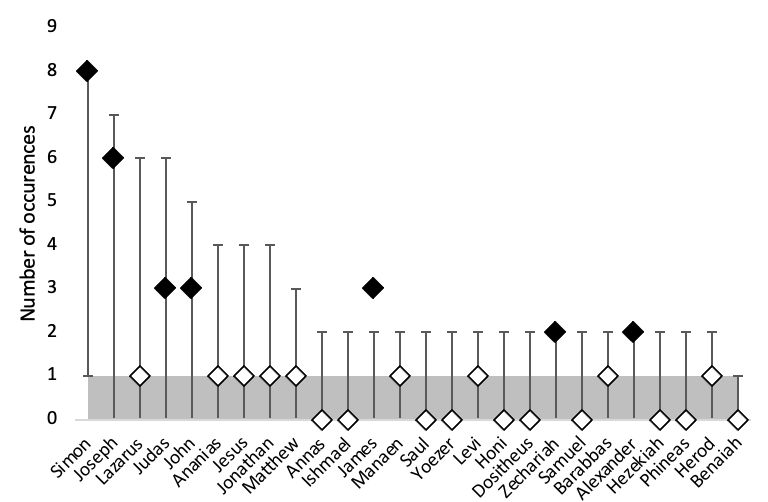

Text(0, 0.5, 'Number of occurences')

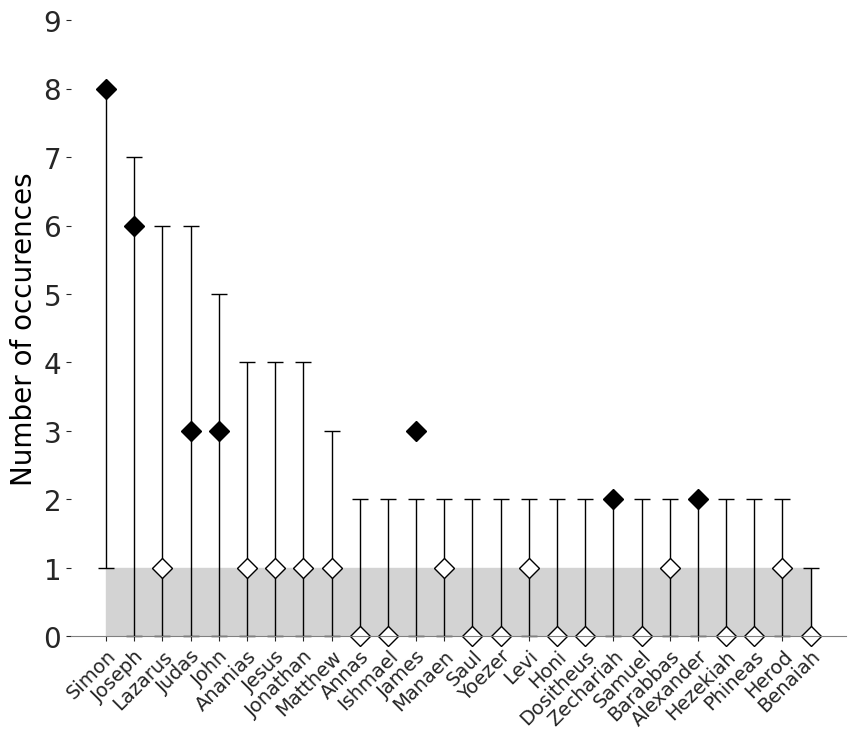

In [9]:
N=len(use_names)
x=np.arange(N)
y=source[idx]

yerr=np.vstack((source[idx]-pl[idx],pu[idx]-source[idx]))
plt.errorbar(x[y>pu_uniform[idx]],y[y>pu_uniform[idx]],yerr=yerr[:,y>pu_uniform[idx]],
             markersize=10,fmt='kD',elinewidth=1,capsize=6,clip_on=False)
plt.errorbar(x[y<=pu_uniform[idx]],y[y<=pu_uniform[idx]],yerr=yerr[:,y<=pu_uniform[idx]],
             markersize=10,fmt='wD',
             elinewidth=1,capsize=6,markeredgecolor='k',ecolor='k',clip_on=False)
#plt.errorbar(x,y,yerr=yerr,markersize=10,fmt='kD',elinewidth=1,capsize=6)

fill_between(x, pu_uniform[idx],color='lightgray')

plt.grid(False)
xticks(range(len(use_names)));
gca().set_xticklabels(use_names,rotation=45,size=14,ha="right",rotation_mode='anchor');
plt.ylim(([0,9]))
plt.box('off')
gca().spines['top'].set_visible(False)
gca().spines['right'].set_visible(False)
gca().spines['left'].set_visible(False)
gca().spines['bottom'].set_color('gray')
ylabel('Number of occurences')

# Chart 2

In [10]:
col='josephus'
source=array(counts_data[col][col])
rest=array(counts_data[col]['rest'])
names=list(counts_data[col]['name'])

pl,pm,pu,n_all=simulate_texts(source,rest,Nsims=50000,);
pl_uniform,pm_uniform,pu_uniform,n_all_uniform=simulate_texts(source,rest,Nsims=50000,distribution='uniform');

idx=find_names(use_names,names)

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

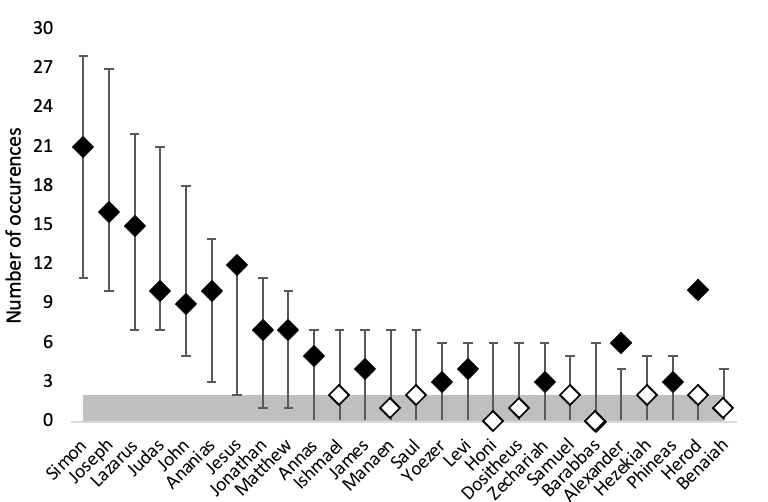

Text(0, 0.5, 'Number of occurences')

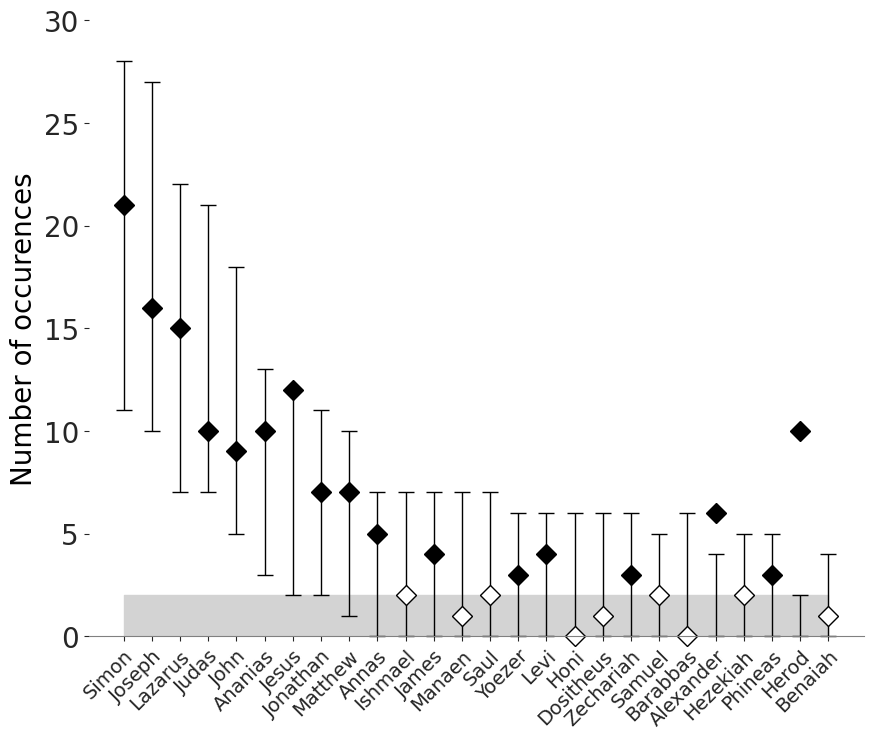

In [11]:
N=len(use_names)
x=np.arange(N)
y=source[idx]

yerr=np.vstack((source[idx]-pl[idx],pu[idx]-source[idx]))
plt.errorbar(x[y>pu_uniform[idx]],y[y>pu_uniform[idx]],yerr=yerr[:,y>pu_uniform[idx]],
             markersize=10,fmt='kD',elinewidth=1,capsize=6,clip_on=False)
plt.errorbar(x[y<=pu_uniform[idx]],y[y<=pu_uniform[idx]],yerr=yerr[:,y<=pu_uniform[idx]],
             markersize=10,fmt='wD',
             elinewidth=1,capsize=6,markeredgecolor='k',ecolor='k',clip_on=False)
#plt.errorbar(x,y,yerr=yerr,markersize=10,fmt='kD',elinewidth=1,capsize=6)

fill_between(x, pu_uniform[idx],color='lightgray')

plt.grid(False)
xticks(range(len(use_names)));
gca().set_xticklabels(use_names,rotation=45,size=14,ha="right",rotation_mode='anchor');
plt.ylim(([0,30]))
plt.box('off')
gca().spines['top'].set_visible(False)
gca().spines['right'].set_visible(False)
gca().spines['left'].set_visible(False)
gca().spines['bottom'].set_color('gray')
ylabel('Number of occurences')

# Chart 3

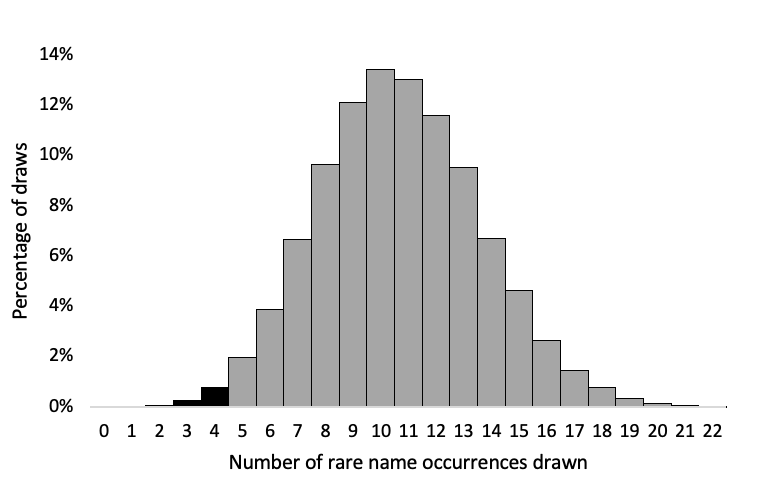

In [12]:
col='gospels_acts_unattested'
source=array(counts_data[col][col])
rest=array(counts_data[col]['rest'])
names=list(counts_data[col]['name'])
pl,pm,pu,n_all=simulate_texts(source,rest,Nsims=50000,);

  0%|          | 0/50000 [00:00<?, ?it/s]

Text(0, 0.5, 'Percentage of draws')

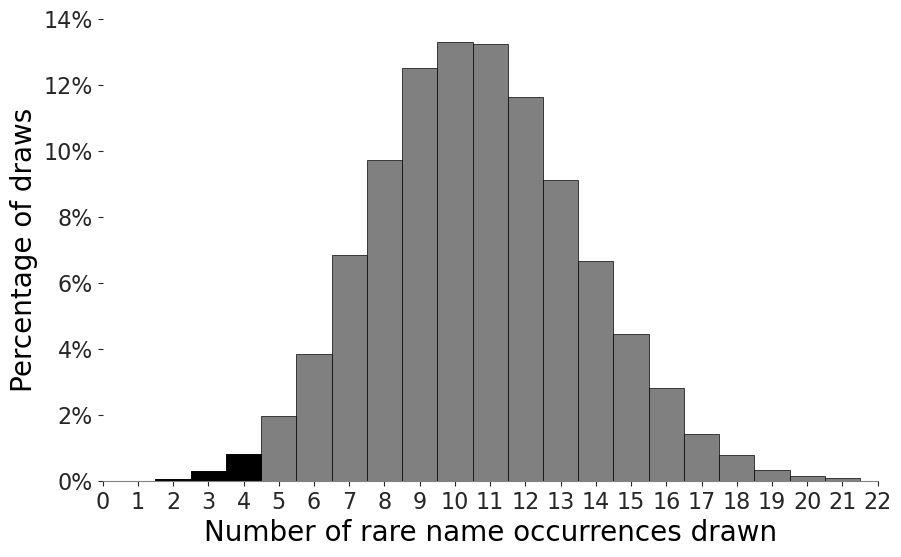

In [13]:
figure(figsize=(10,6))
rare_counts=n_all[:,rest==1].sum(axis=1)
y,_=np.histogram(rare_counts,bins=np.arange(0,23)-0.5)
y=y/sum(y)*100
x=np.arange(len(y))
plt.bar(x,y,color='gray',edgecolor='k',linewidth=.5,width=1)
plt.bar(x[x<=4],y[x<=4],color='black',edgecolor='k',linewidth=.5,width=1)

gca().set_yticks([0,2,4,6,8,10,12,14])
gca().set_yticklabels([f"{_}%"  for _ in [0,2,4,6,8,10,12,14]],fontsize=16)
gca().set_xlim([0,22])
gca().set_xticks(np.arange(23),fontsize=2)
gca().set_xticklabels(np.arange(23),fontsize=16)

plt.grid(None)
gca().spines['top'].set_visible(False)
gca().spines['right'].set_visible(False)
gca().spines['left'].set_visible(False)
gca().spines['bottom'].set_color('gray')

xlabel('Number of rare name occurrences drawn')
ylabel('Percentage of draws')